In [1]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!ls "drive/MyDrive/EDA Dataset"

'Dataset for the Public.csv'   entire_marcos_dataset.csv
 eda_ready_dataset.csv


In [5]:
df = pd.read_csv(r'drive/MyDrive/EDA Dataset/eda_ready_dataset.csv')

In [6]:
df.head()

,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Rating,Reasoning,Remarks,Link Redirect,Reviewer,Review,is_text,is_image,is_url,is_reply
0,02-1,30/03/23 10:03:24,https://twitter.com/lyn77togado/status/6925083...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@lyn77togado,lyn togado,...,NaN,Marcos' last will stated that all of his estat...,"No location, no bio",NaN,NaN,NaN,True,True,False,False
1,02-2,30/03/23 10:20:55,https://twitter.com/gprsphilippines/status/706...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@gprsphilippines,GlobalPinoy,...,NaN,Marcos' last will stated that all of his estat...,"no available location, no account bio, link do...",NaN,NaN,NaN,True,False,True,False
2,02-3,02/04/23 10:06:23,https://twitter.com/Carlojcb2010/status/807799...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@Carlojcb2010,Carlos Jr. Bantulan,...,NaN,There were no mentions of plans for the Filipi...,NaN,http://news.abs-cbn.com/news/11/15/16/look-in-...,NaN,NaN,True,False,True,False
3,02-4,02/04/23 10:42:22,https://twitter.com/Yrrahralph/status/74818105...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@Yrrahralph,harry padayao,...,NaN,The tweet shares a link of an article with a f...,"No account bio, no location",https://newsfeed.ph/facts/ferdinand-marcos-las...,NaN,NaN,True,False,True,False
4,02-5,02/04/23 10:41:18,https://twitter.com/UNGclelaw/status/747645154...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@UNGclelaw,Clelaw.com,...,NaN,The tweet shares a link of an article with a f...,NaN,https://newsfeed.ph/facts/ferdinand-marcos-las...,NaN,NaN,True,False,True,False


## Visualize Data

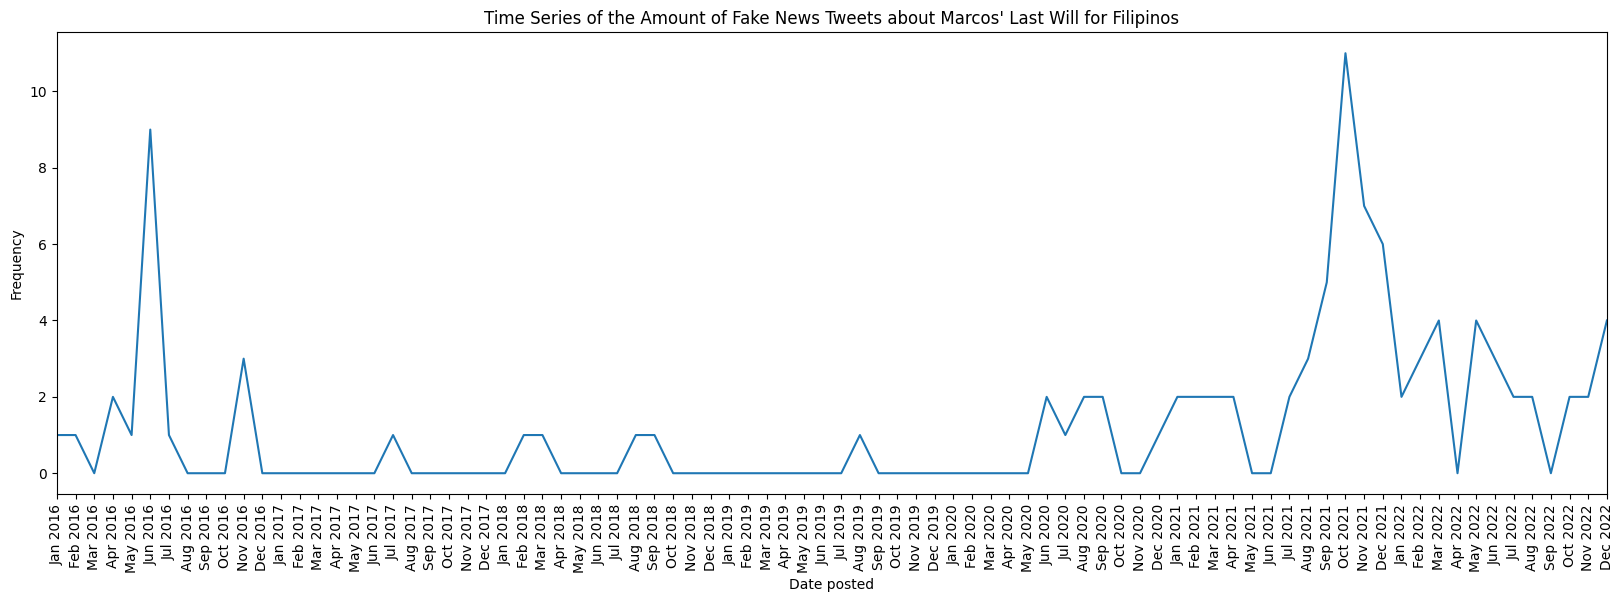

In [7]:
plt.rcParams['figure.figsize'] = [20, 6]
index = df.set_index(pd.to_datetime(df['Date posted'])).resample('1M')['ID'].agg('count').index
plot = df.set_index(pd.to_datetime(df['Date posted'])).resample('1M')['ID'].agg('count').plot.line()
plot.set_xticks(index)
plot.set_xticklabels([x.strftime('%b %Y') for x in index], rotation=90)
plt.title("Time Series of the Amount of Fake News Tweets about Marcos' Last Will for Filipinos")
plt.ylabel("Frequency")
plt.show()

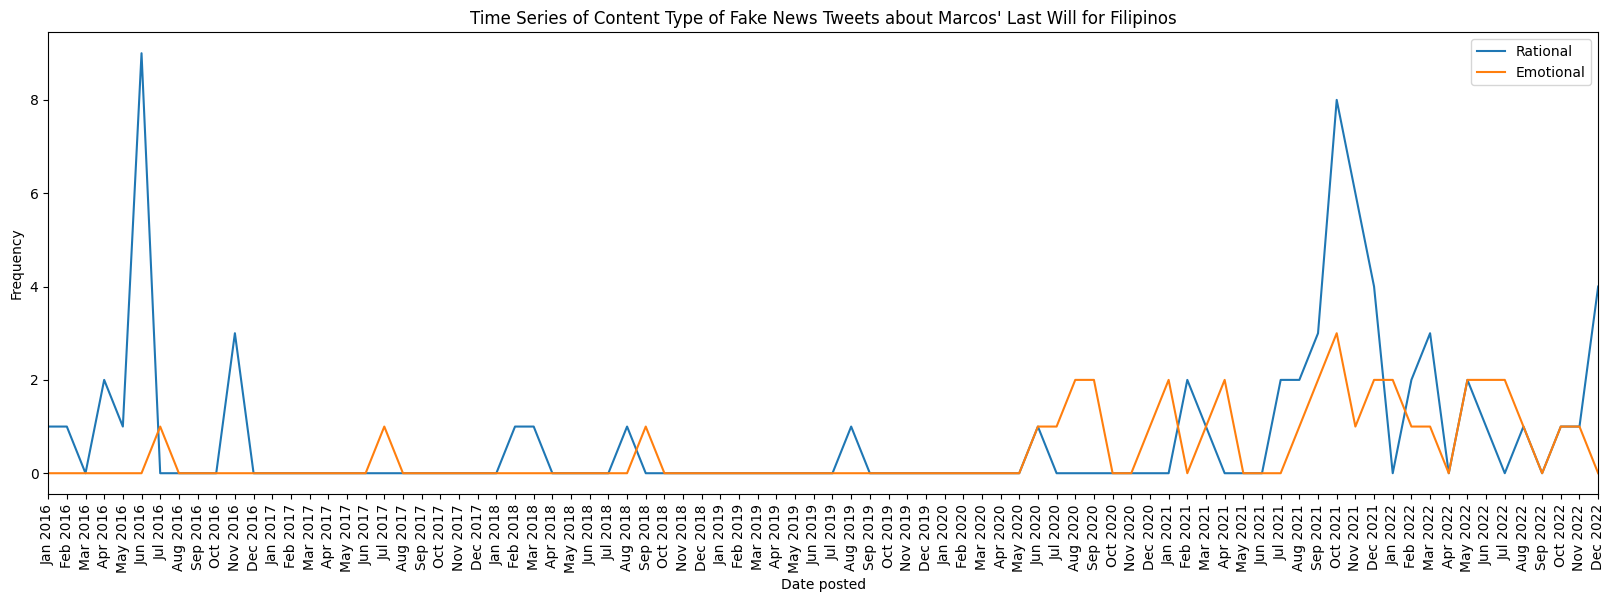

In [8]:
df = pd.concat([df,pd.get_dummies(df['Content type'])], axis=1)

index = df.set_index(pd.to_datetime(df['Date posted'])).resample('1M')[['Rational', 'Emotional']].agg('sum').index
plot = df.set_index(pd.to_datetime(df['Date posted'])).resample('1M')[['Rational', 'Emotional']].agg('sum').plot.line()
plot.set_xticks(index)
plot.set_xticklabels([x.strftime('%b %Y') for x in index], rotation=90)
plt.title("Time Series of Content Type of Fake News Tweets about Marcos' Last Will for Filipinos")
plt.ylabel("Frequency")
plt.show()

Statistical Analysis

Null Hypothesis: There is no significant increase on the number of tweets regarding Marcos's wealth and last will during the years of election.

Set alpha to 0.05, we reject the null hypothesis when p $\leq$ 0.05

## Prepare Data (2019 included in Election Group)


In [9]:
yearly_data = df.set_index(pd.to_datetime(df['Date posted'])).resample('Y')['ID'].agg('count')

election_years = ["2016-12-31", "2021-12-31", "2019-12-31", "2022-12-31"]
no_election_years = ["2017-12-31", "2018-12-31", "2020-12-31"]
elections = yearly_data[yearly_data.index.isin(election_years)]
no_elections = yearly_data[yearly_data.index.isin(no_election_years)]
print(elections.describe())
print(no_elections.describe())


count     4.000000
mean     22.250000
std      17.250604
min       1.000000
25%      13.750000
50%      23.000000
75%      31.500000
max      42.000000
Name: ID, dtype: float64
count    3.000000
mean     4.333333
std      3.511885
min      1.000000
25%      2.500000
50%      4.000000
75%      6.000000
max      8.000000
Name: ID, dtype: float64


## Normality Test

The Shapiro-Wilk test checks whether a given sample follows a normal distribution. The test rejects the hypothesis of normality when p-value ≤ 0.05.

In [10]:
# Normality test
from scipy.stats import shapiro
_, elections_pvalue = shapiro(elections)
_, no_elections_pvalue = shapiro(no_elections)
print("Elections p-value:", elections_pvalue)
print("No Elections p-value:", no_elections_pvalue)


Elections p-value: 0.9916930794715881
No Elections p-value: 0.8428303599357605


Since both the p-values are greater then 0.05, the test suggests that the data follows a normal distribution

## T-test

In [11]:
from scipy.stats import levene

#Levene Test to check whether we can assume equal variance
stat, p = levene(elections, no_elections)
print(p)


0.11354646304218675


p > 0.05, therefore it is safe to assume that the two groups have equal variances

In [12]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(elections, no_elections, equal_var=True)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Print the descriptive statistics
print("\nElections Statistic")
print(elections.describe())

print("\nNo Elections Statistic")
print(no_elections.describe())

T-Statistic: 1.7318110493527028
P-Value: 0.14385525597599125

Elections Statistic
count     4.000000
mean     22.250000
std      17.250604
min       1.000000
25%      13.750000
50%      23.000000
75%      31.500000
max      42.000000
Name: ID, dtype: float64

No Elections Statistic
count    3.000000
mean     4.333333
std      3.511885
min      1.000000
25%      2.500000
50%      4.000000
75%      6.000000
max      8.000000
Name: ID, dtype: float64


Since the p-vale is greater than 0.05, we accept the null hypothesis, i.e. there is no significant increase on the number of tweets regarding Marcos's wealth and last will during the years of election.

Although it may seem that the mean of the elections sample are higher than that of the no elections sample, it can be observed that the standard deviation was high. This is because of the relatively low tweets in 2016, and especially in 2019. There was just a notable increase of tweets during the 2022 election season, starting from the filing of COC. It is observed that the increase in tweets was just caused by the recent election season.

### Test without 2019 in Election Group

In [13]:
yearly_data = df.set_index(pd.to_datetime(df['Date posted'])).resample('Y')['ID'].agg('count')
election_years = ["2016-12-31", "2021-12-31", "2022-12-31"]
no_election_years = ["2017-12-31", "2018-12-31", "2020-12-31", "2019-12-31"]
elections = yearly_data[yearly_data.index.isin(election_years)]
no_elections = yearly_data[yearly_data.index.isin(no_election_years)]
print(elections.describe())
print(no_elections.describe())

count     3.000000
mean     29.333333
std      12.055428
min      18.000000
25%      23.000000
50%      28.000000
75%      35.000000
max      42.000000
Name: ID, dtype: float64
count    4.000000
mean     3.500000
std      3.316625
min      1.000000
25%      1.000000
50%      2.500000
75%      5.000000
max      8.000000
Name: ID, dtype: float64


In [14]:
# Normality test
from scipy.stats import shapiro
_, elections_pvalue = shapiro(elections)
_, no_elections_pvalue = shapiro(no_elections)
print("Elections p-value:", elections_pvalue)
print("No Elections p-value:", no_elections_pvalue)


Elections p-value: 0.8167866468429565
No Elections p-value: 0.24067047238349915


In [15]:
from scipy.stats import levene

#Levene Test to check whether we can assume equal variance
stat, p = levene(elections, no_elections)
print(p)

0.1951362426046501


Again, p>0.05, so it is safe to assume that both groups have equal variances

In [16]:
from scipy.stats import ttest_ind

# Perform independent samples t-test (Welch's)
t_statistic, p_value = ttest_ind(elections, no_elections, equal_var=True)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Print the descriptive statistics
print("\nElections Statistic")
print(elections.describe())

print("\nNo Elections Statistic")
print(no_elections.describe())

T-Statistic: 4.203955065568683
P-Value: 0.008457285701257993

Elections Statistic
count     3.000000
mean     29.333333
std      12.055428
min      18.000000
25%      23.000000
50%      28.000000
75%      35.000000
max      42.000000
Name: ID, dtype: float64

No Elections Statistic
count    4.000000
mean     3.500000
std      3.316625
min      1.000000
25%      1.000000
50%      2.500000
75%      5.000000
max      8.000000
Name: ID, dtype: float64


p value is less than 0.05, therefore we reject the null hypothesis. From here, we can infer that fake news tweets increase significantly during NATIONAL ELECTIONS SEASON (2016, 2021, 2022), or when Bongbong Marcos is running. When the year 2019 is included in the elections group, the two groups do not statistically differ anymore due to the significantly lower number of tweets during this year (when BBM is not running)

# Perform Time Series Analysis

## Perform Peak Detection and Change Point Detection

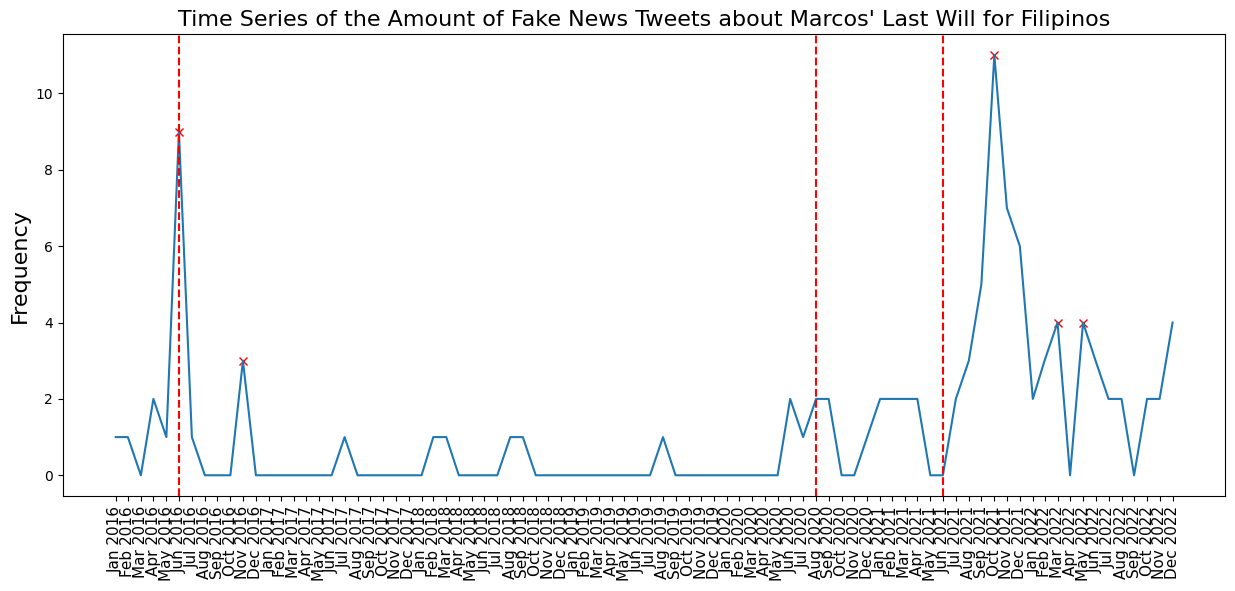

In [18]:
## Perform peak detection
from scipy.signal import find_peaks
import ruptures as rpt

plt.rcParams['figure.figsize'] = [15, 6]
index = df.set_index(pd.to_datetime(df['Date posted'])).resample('1M')['ID'].agg('count').index

# Detecting peaks
data = df.set_index(pd.to_datetime(df['Date posted'])).resample('1M')['ID'].agg('count')
peaks, _ = find_peaks(data.values, distance=2, height=3)

# Plotting the detected peaks
plt.plot(data.index[peaks], data.iloc[peaks], marker='x', linestyle='', color='red')
plt.plot(data)
plt.xticks(index, [x.strftime('%b %Y') for x in index], rotation=90, fontsize = 11)

# Perform change-point detection using ruptures package
model = "rbf"
algo = rpt.Pelt(model=model).fit(data.values)
result = algo.predict(pen = 1)

# Add vertical lines at the change-point locations
for cp in result[:-1]:
    plt.axvline(x=data.index[cp], color='red', linestyle='--')

plt.title("Time Series of the Amount of Fake News Tweets about Marcos' Last Will for Filipinos", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

Insight: It could be seen that in 2016, there are a number of fake news tweets regarding Marcos Sr.'s last will. During this period, the Philippines conducted its national elections, where Bongbong Marcos ran as Vice President. On June 2016, a peak in the time series, Bongbong Marcos released a statement saying that he lost due to the alleged cheating in the elections. A peak also occured on November 2016, the time when Marcos Sr. was buried at Libingan ng mga Bayani.

An increase in tweets occured again starting at the middle of 2021. On October 2021, another observed peak, Bongbong Marcos filed his Certificate of Candidacy as the President of the Philippines.

### Addtl: Peaks of Content Type


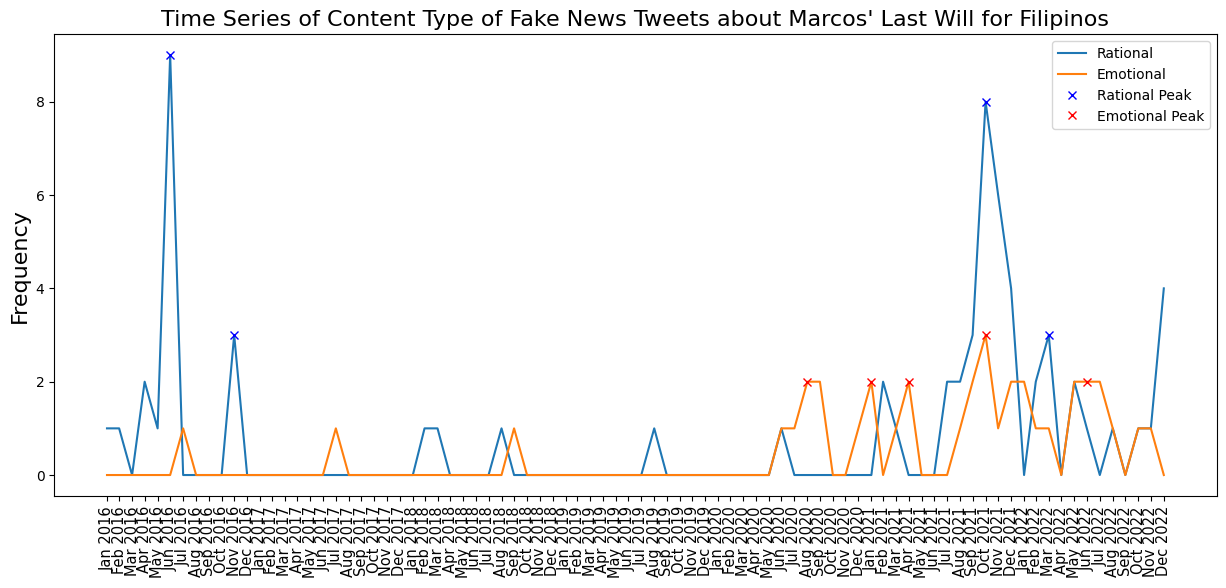

In [19]:
# Resample the data to monthly frequency
df_resampled = df.set_index(pd.to_datetime(df['Date posted'])).resample('1M')[['Rational', 'Emotional']].agg('sum')

# Get the index and data for plotting
index = df_resampled.index
rational_data = df_resampled['Rational']
emotional_data = df_resampled['Emotional']

# Plot the time series
plt.plot(df_resampled["Rational"], label = "Rational")
plt.plot(df_resampled["Emotional"], label = "Emotional")
plt.xticks(index, [x.strftime('%b %Y') for x in index], rotation=90, fontsize=10.5)

# Find peaks in rational data
rational_peaks, _ = find_peaks(rational_data, distance = 2, height = 3)

# Mark rational peaks with 'x'
plt.plot(index[rational_peaks], rational_data.iloc[rational_peaks], marker='x', linestyle='', color='blue', label = 'Rational Peak')

# Find peaks in emotional data
emotional_peaks, _ = find_peaks(emotional_data, distance = 3, height = 2)

# Mark emotional peaks with 'x'
plt.plot(index[emotional_peaks], emotional_data.iloc[emotional_peaks], marker='x', linestyle='', color='red', label = 'Emotional Peak')
plt.xticks(index, rotation=90)


plt.title("Time Series of Content Type of Fake News Tweets about Marcos' Last Will for Filipinos", fontsize = 16)
plt.ylabel("Frequency", fontsize=16)
plt.legend()
plt.show()


# Peak Detection and Change Point Detection for Entire Dataset

Dataset includes all tweets from other groups with Marcos topic

In [20]:
extended_df = pd.read_csv(r'drive/MyDrive/EDA Dataset/entire_marcos_dataset.csv')

In [21]:
extended_df.head()

,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,02-1,30/03/23 10:03:24,https://twitter.com/lyn77togado/status/6925083...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@lyn77togado,lyn togado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-2,30/03/23 10:20:55,https://twitter.com/gprsphilippines/status/706...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@gprsphilippines,GlobalPinoy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02-3,02/04/23 10:06:23,https://twitter.com/Carlojcb2010/status/807799...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@Carlojcb2010,Carlos Jr. Bantulan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02-4,02/04/23 10:42:22,https://twitter.com/Yrrahralph/status/74818105...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@Yrrahralph,harry padayao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02-5,02/04/23 10:41:18,https://twitter.com/UNGclelaw/status/747645154...,2,"Marquez, Ellian Fitzgerald",MRCS,Marcos Sr.'s Wealth for Filipinos According to...,marcos last will,@UNGclelaw,Clelaw.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
!pip install pytz

In [23]:
import pytz
#cleans dataset, need to clean because there are tweets in 2012 and 2023
extended_df['Date posted'] = pd.to_datetime(extended_df['Date posted'], utc=True)
extended_df = extended_df[extended_df['Date posted'].dt.year != 2012]
extended_df = extended_df[extended_df['Date posted'].dt.year != 2023]

<ipython-input-23-6ac10a167214>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  extended_df['Date posted'] = pd.to_datetime(extended_df['Date posted'], utc=True)


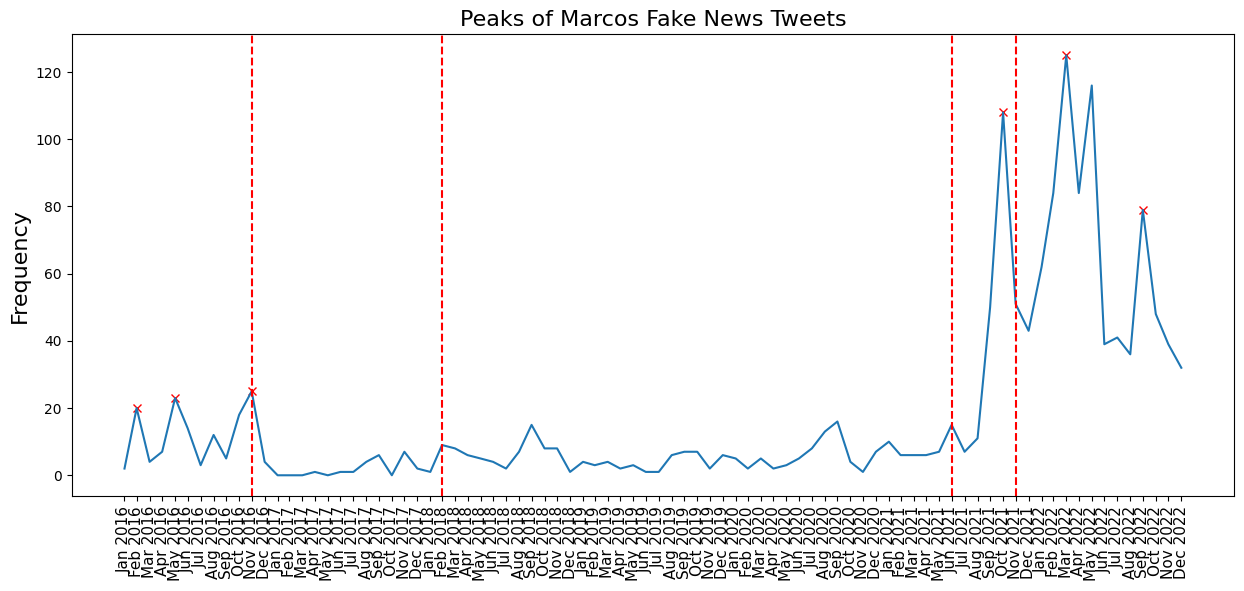

In [24]:
## Perform peak detection

plt.rcParams['figure.figsize'] = [15, 6]
index = extended_df.set_index(extended_df['Date posted']).resample('1M')['ID'].agg('count').index

# Detecting peaks
data = extended_df.set_index(extended_df['Date posted']).resample('1M')['ID'].agg('count')
peaks, _ = find_peaks(data.values, distance=3, height=20)

# Plotting the detected peaks
plt.plot(data.index[peaks], data.iloc[peaks], marker='x', linestyle='', color='red')

plt.plot(data)
plt.xticks(index, [x.strftime('%b %Y') for x in index], rotation=90, fontsize=11)

# Perform change-point detection using ruptures package
model = "rbf"
algo = rpt.Pelt(model=model).fit(data.values)
result = algo.predict(pen = 0.9)

# Add vertical lines at the change-point locations
for cp in result[:-1]:
    plt.axvline(x=data.index[cp], color='red', linestyle='--')

plt.title("Peaks of Marcos Fake News Tweets", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

Insight:
Notably, all of the peaks happened during election seasons--those where Bongbong Marcos ran for a position.

Three peaks observed in 2016, in the months of February, May, and November.Campaign season in 2016 started in February, while the elections itself happened in May. Moreover, in November 2016, Marcos Sr. was buried at Libingan ng Mga Bayani.

Three peaks were also observed in the second election season. In October 2021, Bongbong Marcos filed his Certificate of Candidacy for Presidency. In March 2022, tweets peaked during the height of the campaign season. Last peak was observed in September 2022 ANO NANGYARI DITO??? AHM

A significant change in number of tweets happened after the 2016 elections, and stayed constant until the middle of June 2021. After June 2021, the amount of tweets skyrocketed due to the start of the election season again. And in 2022, tweets remained constantly high.

The model suggests that frequency of fake news tweets regarding Marcos will start to increase just before the year of election (as seen in June to Nov 2021, perhaps starting at the period of filing of candidacy), and will remain constant afterwards (as seen in 2016 and 2022).

*Note that the trend during the filing of candidacy in 2015 was not observed due to the scope of the research*
